### This notebook is written by Jiawen Liang for the AccFin PhD workshop: Python for Data Analysis in Nov 2022. Please do not circulate without permission.

# Statistical models

## topics

- statistical hypothesis t tests

- normality tests

- portfolio optimization

- linear regression





In [ ]:
pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## t-test
- to test whether the means of two independent samples are significantly different.

- Hypothesis:

H0: the means of the samples are equal.

H1: the means of the samples are unequal.

In [2]:
# Exampls
# ttest_ind: calculate the T-test for the means of two independent samples of scores.
from scipy.stats import ttest_ind
d1 = [0.843, 2.49, 1.394, -0.394, -0.349, -1.135, -1.149]
d2 = [1.142, -0.850, -0.942, 0.395, -1.395, -1.502, -1.425]

stat, p = ttest_ind(d1, d2)
print("t-statistics%.3f"% stat, "p%.3f"% p)
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

t-statistics1.384 p0.192
Probably the same distribution


## Normaility tests
- to validate the assumption that data are normally distributed.
- important for financial models, such as MV, CAPM.
- e.g. check whether returns are normally distributed.

In [3]:
price_df = pd.read_csv("data/stock_prices.csv")
price_df.head()

,date,AAPL,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM
0,29/12/1989,0.117203,0.352438,3.9375,3.486070,1.752478,2.365775,1.766756,NaN,0.166287,0.110818,1.827968
1,02/01/1990,0.123853,0.364733,4.1250,3.660858,1.766686,2.398184,1.766756,NaN,0.173216,0.113209,1.835617
2,03/01/1990,0.124684,0.364050,4.0000,3.660858,1.780897,2.356516,1.749088,NaN,0.194001,0.113608,1.896803
3,04/01/1990,0.125100,0.362001,3.9375,3.641439,1.743005,2.403821,1.731422,NaN,0.190537,0.115402,1.904452
4,05/01/1990,0.125516,0.358586,3.8125,3.602595,1.705114,2.287973,1.722587,NaN,0.190537,0.114405,1.912100


In [4]:
price_df.set_index("date")

,AAPL,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM
date,,,,,,,,,,,
29/12/1989,0.117203,0.352438,3.9375,3.486070,1.752478,2.365775,1.766756,NaN,0.166287,0.110818,1.827968
02/01/1990,0.123853,0.364733,4.1250,3.660858,1.766686,2.398184,1.766756,NaN,0.173216,0.113209,1.835617
03/01/1990,0.124684,0.364050,4.0000,3.660858,1.780897,2.356516,1.749088,NaN,0.194001,0.113608,1.896803
04/01/1990,0.125100,0.362001,3.9375,3.641439,1.743005,2.403821,1.731422,NaN,0.190537,0.115402,1.904452
05/01/1990,0.125516,0.358586,3.8125,3.602595,1.705114,2.287973,1.722587,NaN,0.190537,0.114405,1.912100
...,...,...,...,...,...,...,...,...,...,...,...
05/04/2018,172.800003,13.430000,10.0200,87.809998,30.320000,35.632843,76.019997,14.52,72.120003,35.730000,111.879997
06/04/2018,168.380005,13.060000,9.6100,86.690002,29.629999,35.130001,74.870003,13.97,70.489998,35.169998,109.089996
09/04/2018,170.050003,12.830000,9.5300,86.279999,29.870001,35.169998,74.870003,13.93,69.820000,35.459999,110.400002


In [5]:
log_return = np.log(price_df.AAPL) - np.log(price_df.AAPL.shift(1))

Text(0, 0.5, 'sample quantiles')

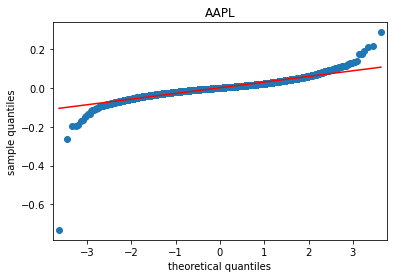

In [6]:
# normality test
# quantiles
sm.qqplot(log_return.dropna(), line='s')
plt.title('AAPL')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

The sample quantile values do not lie on a straight line, indicating “non-normality.”!

## Portfolio optimization
- use library: pypfopt
- a very useful and open-source library to do portfolio optimization
- include expected returns, covariance matrix, mean-variance optimization, sharpe ratio, efficient frontier...

In [7]:
import yfinance as yf
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier

tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH"] 

ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [8]:
price_df2 = ohlc["Adj Close"].dropna(how="all")
price_df2.head()

,AMZN,COST,JPM,KO,LUV,MA,MSFT,PFE,UNH,XOM
Date,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,0.050016,NaN,NaN,NaN,NaN,NaN,0.099852
1962-01-03,NaN,NaN,NaN,0.048902,NaN,NaN,NaN,NaN,NaN,0.101335
1962-01-04,NaN,NaN,NaN,0.049273,NaN,NaN,NaN,NaN,NaN,0.101582
1962-01-05,NaN,NaN,NaN,0.048159,NaN,NaN,NaN,NaN,NaN,0.099357
1962-01-08,NaN,NaN,NaN,0.047664,NaN,NaN,NaN,NaN,NaN,0.099110


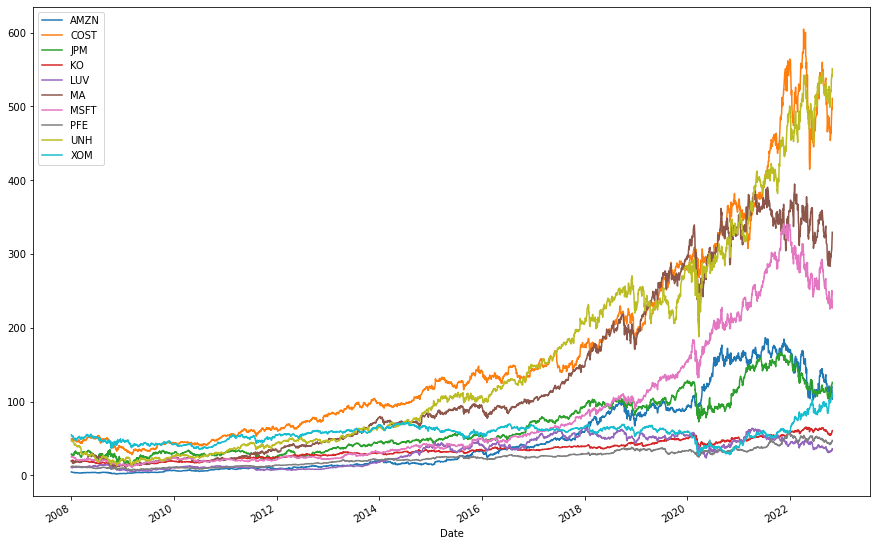

In [9]:
price_df2[price_df2.index >= "2008-01-01"].plot(figsize=(15,10));

In [11]:
mu = expected_returns.mean_historical_return(price_df2)
mu

AMZN    0.315008
COST    0.122615
JPM     0.117060
KO      0.123994
LUV     0.133325
MA      0.303446
MSFT    0.252895
PFE     0.117062
UNH     0.248631
XOM     0.122303
dtype: float64

In [13]:
sample_cov = risk_models.sample_cov(price_df2, frequency=252)
sample_cov

,AMZN,COST,JPM,KO,LUV,MA,MSFT,PFE,UNH,XOM
AMZN,0.330732,0.048044,0.066308,0.020207,0.048099,0.057070,0.072796,0.031278,0.034871,0.026829
COST,0.048044,0.101419,0.038569,0.021400,0.031200,0.032469,0.037511,0.025415,0.027556,0.020350
JPM,0.066308,0.038569,0.128153,0.027801,0.049205,0.069563,0.049320,0.032777,0.038674,0.033175
KO,0.020207,0.021400,0.027801,0.053583,0.022965,0.026289,0.027803,0.026063,0.023022,0.020633
LUV,0.048099,0.031200,0.049205,0.022965,0.138683,0.048800,0.037023,0.025933,0.032462,0.023463
MA,0.057070,0.032469,0.069563,0.026289,0.048800,0.118253,0.049773,0.032262,0.042773,0.041775
MSFT,0.072796,0.037511,0.049320,0.027803,0.037023,0.049773,0.114624,0.030683,0.034068,0.029024
PFE,0.031278,0.025415,0.032777,0.026063,0.025933,0.032262,0.030683,0.076170,0.028309,0.022980
UNH,0.034871,0.027556,0.038674,0.023022,0.032462,0.042773,0.034068,0.028309,0.161691,0.022437
XOM,0.026829,0.020350,0.033175,0.020633,0.023463,0.041775,0.029024,0.022980,0.022437,0.052681


In [15]:
S = risk_models.risk_matrix(price_df2)
S

,AMZN,COST,JPM,KO,LUV,MA,MSFT,PFE,UNH,XOM
AMZN,0.330732,0.048044,0.066308,0.020207,0.048099,0.057070,0.072796,0.031278,0.034871,0.026829
COST,0.048044,0.101419,0.038569,0.021400,0.031200,0.032469,0.037511,0.025415,0.027556,0.020350
JPM,0.066308,0.038569,0.128153,0.027801,0.049205,0.069563,0.049320,0.032777,0.038674,0.033175
KO,0.020207,0.021400,0.027801,0.053583,0.022965,0.026289,0.027803,0.026063,0.023022,0.020633
LUV,0.048099,0.031200,0.049205,0.022965,0.138683,0.048800,0.037023,0.025933,0.032462,0.023463
MA,0.057070,0.032469,0.069563,0.026289,0.048800,0.118253,0.049773,0.032262,0.042773,0.041775
MSFT,0.072796,0.037511,0.049320,0.027803,0.037023,0.049773,0.114624,0.030683,0.034068,0.029024
PFE,0.031278,0.025415,0.032777,0.026063,0.025933,0.032262,0.030683,0.076170,0.028309,0.022980
UNH,0.034871,0.027556,0.038674,0.023022,0.032462,0.042773,0.034068,0.028309,0.161691,0.022437
XOM,0.026829,0.020350,0.033175,0.020633,0.023463,0.041775,0.029024,0.022980,0.022437,0.052681


In [16]:
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AMZN', 0.00913),
             ('COST', 0.11425),
             ('JPM', -0.00748),
             ('KO', 0.30476),
             ('LUV', 0.06503),
             ('MA', -0.04857),
             ('MSFT', 0.01994),
             ('PFE', 0.13541),
             ('UNH', 0.05536),
             ('XOM', 0.35219)])

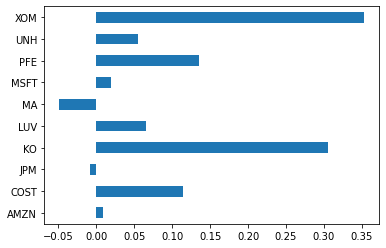

In [17]:
pd.Series(weights).plot.barh();

## Linear regression

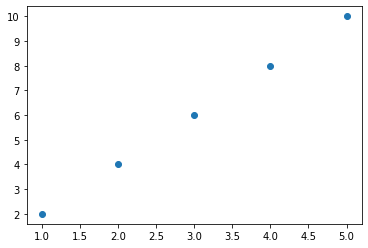

In [18]:
X = [[1],[2],[3],[4],[5]] # independent variables: 2 dimensional form 
Y = [2,4,6,8,10]
plt.scatter(X,Y) # scatter diagram
plt.show()

In [20]:
# Scikit-Learn
ln_reg = LinearRegression()
ln_reg.fit(X,Y) # use fit() to build the linear regression model

LinearRegression()

In [21]:
y = ln_reg.predict([[1.5]])
y

array([3.])

In [22]:
y = ln_reg.predict([[1.5], [2.4],[3.4]])
y

array([3. , 4.8, 6.8])

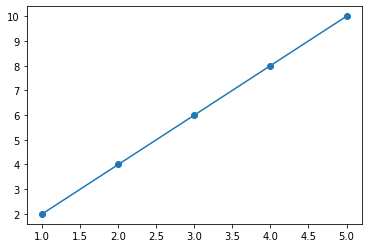

In [23]:
plt.scatter(X,Y)
plt.plot(X, ln_reg.predict(X))
plt.show()


In [24]:
# coefficient
str(ln_reg.coef_[0])

'2.0'

In [25]:
# intercept
str(ln_reg.intercept_)

'0.0'

In [26]:
# so, the predicted linear model is Y = 2X

Please import the dataset in "data/linear_regression" folder.
in the trainning dataset: x can best estimate y.

This dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/andonians/random-linear-regression

In [27]:
train_df = pd.read_csv("data/linear_regression/train.csv")
train_df.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [28]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [29]:
train_df.dropna(inplace=True)

In [30]:
x1 = train_df.x.values.reshape(-1, 1) #-1: it is an unknown dimension and we want numpy to figure it out
y1 = train_df.y.values

In [31]:
x1

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [32]:
reg1 = LinearRegression()
reg1.fit(x1,y1)

LinearRegression()

In [33]:
yhat1 = reg1.predict(x1)
reg_sc = reg1.score(x1,y1)

In [34]:
# Return the coefficient of determination of the prediction.
print("score:", reg_sc)

score: 0.9907015319025518


In [35]:
reg1.coef_[0]

1.0006563818563037

In [36]:
reg1.intercept_

-0.10726546430095851

In [37]:
test_df = pd.read_csv("data/linear_regression/test.csv")
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [38]:
x2 = test_df.x.values.reshape(-1, 1)
y2 = test_df.y.values

In [39]:
yhat2 = reg1.predict(x2)

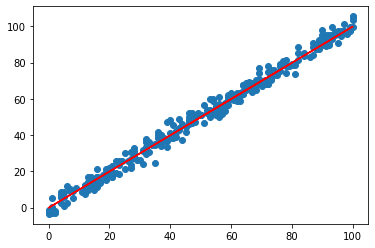

In [40]:
plt.scatter(x=test_df.x, y=test_df.y)
plt.plot(x2, yhat2, c='r')

In [42]:
# ols performance
# R-square, t-test, p value
import statsmodels.api as sm
est = sm.OLS(y1, x1).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.955e+05
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:11:12   Log-Likelihood:                         -1712.9
No. Observations:                 699   AIC:                                      3428.
Df Residuals:                     698   BIC:                                      3432.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Exercise: 
1. create a list of independent variable X and dependent variable Y.
2. try linear regression
3. predict y with some x values by your regression model
4. find the coefficient and intercept